In [1]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# _root_path = '/content/drive/MyDrive/PoliticalSentimentAnalysis/'
_root_path = '../'

plt.rcParams["figure.figsize"] = (8, 5)
plt.rc('font', size=12)

# load data
with open(_root_path + 'data/tweets.pkl', 'rb') as f:
    tweets_df = pickle.load(f)
tweets_df.sort_values(by='Date', inplace=True)

# Rename party for clearer plots and set party color
tweets_df.Party = tweets_df.Party.apply(lambda p: 'Republican' if p == 'R' else 'Democratic')
party_colors = dict(
    D='tab:blue',
    Democratic='tab:blue',
    R='tab:red',
    Republican='tab:red',
)

# Add dummy for easier computation
tweets_df['Tweets'] = 1


# Analysis of data

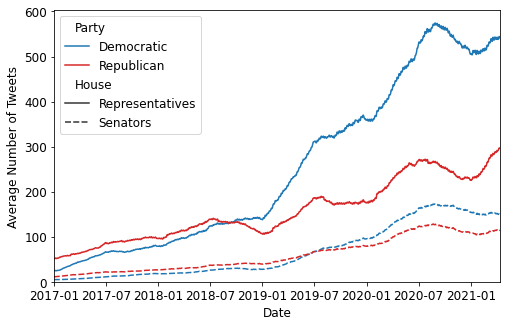

In [51]:
# Rolling average tweets per day
df = tweets_df.groupby(['Party', 'House', tweets_df['Date'].dt.date])['id'].count()
df = df.to_frame().reset_index()
df['rolling'] = df.id.rolling(180).mean()

sns.lineplot(data=df, x='Date', y='rolling', hue='Party', style='House', palette=party_colors)

plt.xlabel('Date')
plt.ylabel('Average Number of Tweets')
plt.xlim([datetime.date(2017,1,1), datetime.date(2021,4,14)])
plt.ylim(bottom=0)
plt.savefig(_root_path + 'output/figures/average_tweets_per_day.png')
plt.show()

In [59]:
# Cumulative number of accounts per party
df = tweets_df.groupby(['Party', 'House', 'user',])['Date'].min().dt.date
df = df.to_frame().reset_index()
df['count'] = 1
df.sort_values('Date', inplace=True)
df['cumulative'] = df.groupby(['Party', 'House'])['count'].cumsum()

# add last day point for nice plot
max = df.groupby(['Party', 'House'])['cumulative'].max().to_frame().reset_index()
max['Date'] = datetime.date(2021,4,14)
df = df.append(max)

print('days with most new accounts')
print(df.Date.value_counts()[:5])

days with most new accounts
2021-01-03    37
2019-01-03    26
2019-01-04    12
2021-01-04     8
2015-01-06     8
Name: Date, dtype: int64


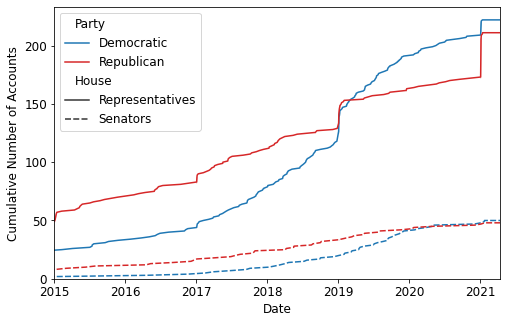

In [60]:
# sns.displot(df, x='Date', hue='Party',  kind='ecdf') # palette={'R': '.05', 'D': '.5'}
sns.lineplot(data=df, x='Date', y='cumulative', hue='Party', style='House', palette=party_colors)

plt.xlabel('Date')
plt.ylabel('Cumulative Number of Accounts')
plt.xlim([datetime.date(2015,1,1), datetime.date(2021,4,14)])
plt.ylim(bottom=0)
plt.savefig(_root_path + 'output/figures/cumulative_accounts_per_party.png')
plt.show()

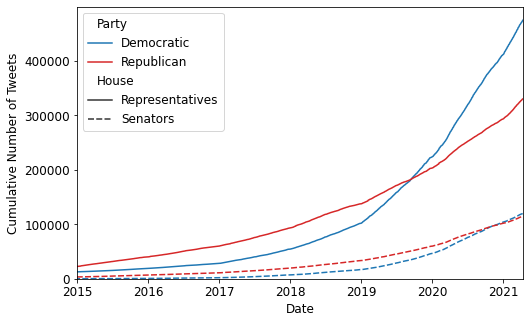

In [64]:
# cumulative number of tweets per party
df = tweets_df.groupby(['Party', 'House', tweets_df['Date'].dt.date])['id'].count()
df = df.to_frame().reset_index()
df['cumulative'] = df.groupby(['Party', 'House'])['id'].cumsum()

sns.lineplot(data=df, x='Date', y='cumulative', hue='Party', style='House', palette=party_colors)

plt.xlabel('Date')
plt.ylabel('Cumulative Number of Tweets')
plt.xlim([datetime.date(2015,1,1), datetime.date(2021,4,14)])
plt.ylim(bottom=0)
plt.savefig(_root_path + 'output/figures/cumulative_tweets_per_party.png')
plt.show()

# Ratio number of tweets
# sns.displot(tweets_df, x='Date', hue='Party', kind='ecdf')

# Analysis likes and retweets

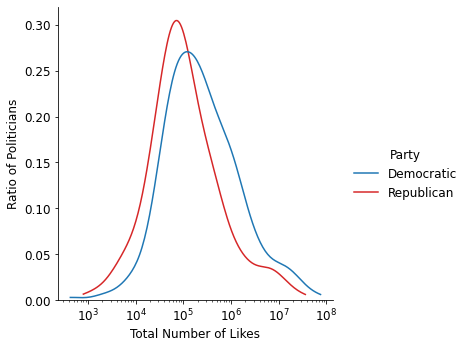

In [73]:
# Histogram of num likes per user and party
df = tweets_df.groupby(['Party', 'user'])['Likes'].sum()
df = df.to_frame().reset_index()

sns.displot(df, x='Likes', hue='Party', kind='kde', cut=0., log_scale=True, palette=party_colors)
# plt.xlim((0, 3200))
#plt.tight_layout()
plt.xlabel('Total Number of Likes')
plt.ylabel('Ratio of Politicians')
plt.show()

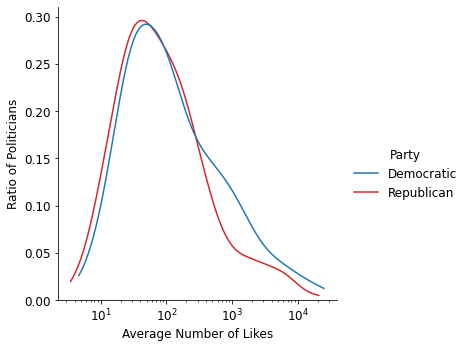

In [74]:
# Histogram of num likes per user and party
df = tweets_df.groupby(['Party', 'user'])['Likes'].mean()
df = df.to_frame().reset_index()

sns.displot(df, x='Likes', hue='Party', kind='kde', cut=0., log_scale=True, palette=party_colors)

plt.xlabel('Average Number of Likes')
plt.ylabel('Ratio of Politicians')
plt.show()


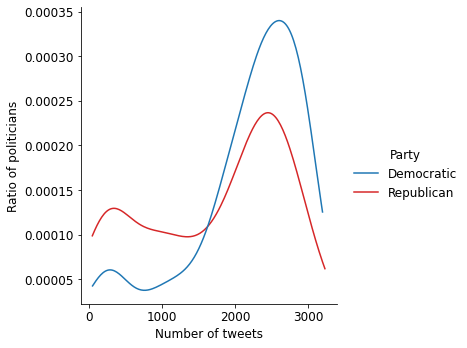

In [75]:
# Histogram of num tweets per user and party
df = tweets_df.groupby(['Party', 'user'])['id'].count()
df = df.to_frame().reset_index()

sns.displot(df, x='id', hue='Party', kind='kde', cut=0., palette=party_colors)

plt.xlabel('Number of tweets')
plt.ylabel('Ratio of politicians')
plt.show()

# Statistics

In [2]:
print('Total number of tweets:', len(tweets_df))
print('Number of replys:', sum(tweets_df.reply_to.astype(bool)))

tweets_df = tweets_df[tweets_df.Date > datetime.datetime(2019,1,1)]

print('Studied number of tweets:', len(tweets_df))
print('Number of replys:', sum(tweets_df.reply_to.astype(bool)))
print('Number of user:', len(tweets_df.user.unique()))
print('Tweets per user:', str(len(tweets_df) / len(tweets_df.user.unique())))

Total number of tweets: 1041292
Number of replys: 135085
Studied number of tweets: 751272
Number of replys: 114159


In [12]:
print('Used Twitter device/app:')
tweets_df.source.value_counts()

Used Twitter device/app:


Twitter Web App                     308408
Twitter for iPhone                  228886
TweetDeck                            92231
Twitter Web Client                   54047
Twitter Media Studio                 32129
Hootsuite Inc.                       14490
Twitter for iPad                      7545
Twitter for Android                   5122
Sprout Social                         1777
Instagram                             1727
Gain Platform                         1450
Twitter for Advertisers (legacy)      1293
Buffer                                 580
Periscope                              333
Tweetbot for Mac                       265
Twitter Ads                            198
CoSchedule                             167
Echofon                                118
Zendesk                                100
Zoho Social                             98
Twitter for Advertisers                 90
Tweetbot for iΟS                        55
Twuffer                                 30
Fireside Pu

In [2]:
print('Statistics of average activity')
#  Average numbers
col = ['Likes', 'Retweets', 'Polarity']
statistics = tweets_df.groupby(['Party', 'House'])[col].mean().round(2)
statistics.columns = ['Ø Likes', 'Ø Retweets', 'Ø Polarity']
statistics['# User'] = tweets_df.groupby(['Party', 'House'])['user'].unique().apply(len)
statistics['# Tweets/User'] = tweets_df.groupby(['Party', 'House', 'user'])['id'].count().groupby(['Party', 'House']).mean().astype(int)
statistics['Ø Acc Opening'] = tweets_df.groupby(['Party', 'House', 'user',])['Date'].min().groupby(['Party', 'House']).apply(np.mean).dt.date
statistics

Statistics of average activity


Ø Likes  Ø Retweets  Ø Polarity  # User  \
Party      House                                                      
Democratic Representatives   583.99      151.55        0.15     222   
           Senators         1451.83      319.71        0.01      50   
Republican Representatives   357.10       95.96        0.30     211   
           Senators          732.48      187.74        0.24      48   

                            # Tweets/User Ø Acc Opening  
Party      House                                         
Democratic Representatives           2141    2017-12-31  
           Senators                  2401    2018-12-14  
Republican Representatives           1567    2017-04-07  
           Senators                  2394    2017-06-17

In [ ]:
# latex export
print(statistics.to_latex())

In [3]:
print('Most popular users by likes')
active_users = tweets_df.groupby(['Party', 'House', 'user'])[col].mean().round(2)
active_users.columns = ['Ø Likes', 'Ø Retweets', 'Ø Polarity']
active_users['# Tweets'] = tweets_df.groupby(['Party', 'House', 'user'])['id'].count()
active_users.sort_values('Ø Likes', ascending=False, inplace=True)
active_users[:10]

Most popular users by likes


Ø Likes  Ø Retweets  Ø Polarity  \
Party      House           user                                                
Democratic Senators        SenSanders       25011.12     4544.77       -0.38   
           Representatives RepAdamSchiff    24701.23     7782.67       -0.28   
Republican Representatives Jim_Jordan       20922.92     5338.86       -0.19   
Democratic Representatives SpeakerPelosi    14762.72     3481.52        0.02   
                           RepSwalwell      13485.57     2675.20        0.15   
           Senators        ossoff           11229.98     1727.41        0.17   
                           SenSchumer        9102.02     1847.05       -0.29   
Republican Representatives GOPLeader         7776.32     2159.64       -0.16   
Democratic Representatives RepMaxineWaters   7475.39     2134.87        0.14   
Republican Representatives RepMattGaetz      7040.51     1496.67       -0.03   

                                            # Tweets  
Party      House           user                       
Democratic Senators        SenSanders            728  
           Representatives RepAdamSchiff        3081  
Republican Representatives Jim_Jordan           1744  
Democratic Representatives SpeakerPelosi        2671  
                           RepSwalwell          1840  
           Senators        ossoff               2179  
                           SenSchumer           2376  
Republican Representatives GOPLeader            1081  
Democratic Representatives RepMaxineWaters      2093  
Republican Representatives RepMattGaetz         2131

In [ ]:
# latex export
print(active_users[:10].to_latex())